In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The urllib.request module is used to open URLs. The Beautiful Soup package is used to extract data from html files. 
The Beautiful Soup library's name is bs4 which stands for Beautiful Soup, version 4.

In [119]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [120]:
url="http://www.hubertiming.com/results/2017GPTR10K"
html=urlopen(url)

In [121]:
soup=BeautifulSoup(html,'lxml')
type(soup)

bs4.BeautifulSoup

In [122]:
title=soup.title
print(title)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [ ]:
text=soup.get_text()
print(text)

In [124]:
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com/">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR#individual" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertimin

In [125]:
all_links=soup.find_all('a')
for link in all_links:
    print(link.get('href'))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2017GPTR#individual
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [126]:
rows=soup.find_all('tr')
print(rows[:10])

[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Gun Time</th>
<th>Team</th>
<th>Chip Time</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:24</td>
<td></td>
<td>36:21</td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
<td>36:42</td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<td>

                    FRANCISCO MAYA

      

In [127]:
for row in rows:
    row_td=row.find_all('td')
print(row_td)
type(row_td)

[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:42:10</td>, <td></td>, <td>1:41:18</td>]


bs4.element.ResultSet

In [128]:
str_cells=str(row_td)
cleantext=BeautifulSoup(str_cells,'lxml').get_text()
print(cleantext)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:42:10, , 1:41:18]


In [129]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:42:10, , 1:41:18]


str

In [130]:
df=pd.DataFrame(list_rows)
df.head(6)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."


In [131]:
df.sample(6)

,0
234,"[230, 675, \r\n\r\n BAMIDEL..."
209,"[205, 69, \r\n\r\n KEATON W..."
211,"[207, 48, \r\n\r\n LOUISE R..."
161,"[157, 422, \r\n\r\n TRISTAN..."
64,"[60, 39, \r\n\r\n BRANDON L..."
319,"[315, 884, \r\n\r\n YOSHIKA..."


Data Manipulation and Cleaning

In [132]:
df1=df[0].str.split(',',expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:24,,36:21]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:45,\n\r\n INTEL TEAM ...,36:42]
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:48,,37:44]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:37,,38:34]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:24,\n\r\n INTEL TEAM ...,39:21]


In [133]:
df1[0]=df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:24,,36:21]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:45,\n\r\n INTEL TEAM ...,36:42]
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:48,,37:44]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:37,,38:34]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:24,\n\r\n INTEL TEAM ...,39:21]


In [134]:
df1[0]=df1[0].str.strip(']')
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:24,,36:21]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:45,\n\r\n INTEL TEAM ...,36:42]
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:48,,37:44]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:37,,38:34]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:24,\n\r\n INTEL TEAM ...,39:21]


In [135]:
col_labels = soup.find_all('th')
col_labels

[<th>Place</th>,
 <th>Bib</th>,
 <th>Name</th>,
 <th>Gender</th>,
 <th>City</th>,
 <th>State</th>,
 <th>Gun Time</th>,
 <th>Team</th>,
 <th>Chip Time</th>]

In [136]:
all_header=[]
col_str=str(col_labels)
cleantext2=BeautifulSoup(col_str,'lxml').get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Gun Time, Team, Chip Time]']


In [137]:
df2=pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Gun Ti..."


In [138]:
df3=df2[0].str.split(',',expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Gun Time,Team,Chip Time]


In [139]:
frames=[df3,df1]
df4=pd.concat(frames)

In [140]:
df4.head(10)

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Gun Time,Team,Chip Time]
0,,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:24,,36:21]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:45,\n\r\n INTEL TEAM ...,36:42]
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:48,,37:44]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:37,,38:34]


In [141]:
df5=df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Gun Time,Team,Chip Time]
0,[Place,Bib,Name,Gender,City,State,Gun Time,Team,Chip Time]
0,,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None


In [142]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   [Place       583 non-null    object
 1    Bib         581 non-null    object
 2    Name        578 non-null    object
 3    Gender      578 non-null    object
 4    City        578 non-null    object
 5    State       578 non-null    object
 6    Gun Time    578 non-null    object
 7    Team        578 non-null    object
 8    Chip Time]  578 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB


(583, 9)

The table has 583 rows and 9 columns. You can drop all rows with any missing values.

In [143]:
df6=df5.dropna(axis=0,how='any')
df6.head()

,[Place,Bib,Name,Gender,City,State,Gun Time,Team,Chip Time]
0,[Place,Bib,Name,Gender,City,State,Gun Time,Team,Chip Time]
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:24,,36:21]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:45,\n\r\n INTEL TEAM ...,36:42]
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:48,,37:44]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:37,,38:34]


Also, notice how the table header is replicated as the first row in df5. It can be dropped using the following line of code.

In [144]:
df6.index[0]

0

In [145]:
df7=df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Gun Time,Team,Chip Time]
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:24,,36:21]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:45,\n\r\n INTEL TEAM ...,36:42]
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:48,,37:44]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:37,,38:34]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:24,\n\r\n INTEL TEAM ...,39:21]


In [146]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Gun Time,Team,Chip Time]
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:24,,36:21]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:45,\n\r\n INTEL TEAM ...,36:42]
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:48,,37:44]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:37,,38:34]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:24,\n\r\n INTEL TEAM ...,39:21]


In [147]:
df7.rename(columns={' Chip Time]': 'Chip Time'},inplace=True)

In [148]:
df7.head(5)

,Place,Bib,Name,Gender,City,State,Gun Time,Team,Chip Time
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:24,,36:21]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:45,\n\r\n INTEL TEAM ...,36:42]
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:48,,37:44]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:37,,38:34]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:24,\n\r\n INTEL TEAM ...,39:21]


In [167]:
df7['Chip Time']=df7['Chip Time'].str.replace(']','')

In [168]:
df7.head(5)

,Place,Bib,Name,Gender,City,State,Gun Time,Team,Chip Time
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:24,,00:36:21
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:45,\n\r\n INTEL TEAM ...,00:36:42
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:48,,00:37:44
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:37,,00:38:34
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:24,\n\r\n INTEL TEAM ...,00:39:21


In [151]:
df7['Chip Time'].iloc[1]

' 36:42]'

In [152]:
df7['Chip Time']=df7['Chip Time'].str.strip(' ')
df7

,Place,Bib,Name,Gender,City,State,Gun Time,Team,Chip Time
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:24,,36:21]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:45,\n\r\n INTEL TEAM ...,36:42]
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:48,,37:44]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:37,,38:34]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:24,\n\r\n INTEL TEAM ...,39:21]
...,...,...,...,...,...,...,...,...,...
577,573,273,\r\n\r\n RACHEL L VANEY\r\...,F,OTHER,OR,1:38:34,,1:38:17]
578,574,467,\r\n\r\n ROHIT B DSOUZA\r\...,M,PORTLAND,OR,1:40:32,\n\r\n INTEL TEAM ...,1:38:31]
579,575,471,\r\n\r\n CENITA D'SOUZA\r\...,F,PORTLAND,OR,1:40:34,,1:38:32]
580,576,338,\r\n\r\n PRANAVI APPANA\r\...,F,HILLSBORO,OR,1:42:01,,1:40:47]


In [153]:
df7['Chip Time'].iloc[1]

'36:42]'

In [154]:
len(df7['Chip Time'].iloc[1])

6

In [155]:
s=len(df7['Chip Time']==8)
s

577

In [156]:
df7['Chip Time']=np.where(len(df7['Chip Time']==8),df7['Chip Time'].str.zfill(11),df7['Chip Time']) 
df7

,Place,Bib,Name,Gender,City,State,Gun Time,Team,Chip Time
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:24,,0000036:21]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:45,\n\r\n INTEL TEAM ...,0000036:42]
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:48,,0000037:44]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:37,,0000038:34]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:24,\n\r\n INTEL TEAM ...,0000039:21]
...,...,...,...,...,...,...,...,...,...
577,573,273,\r\n\r\n RACHEL L VANEY\r\...,F,OTHER,OR,1:38:34,,0001:38:17]
578,574,467,\r\n\r\n ROHIT B DSOUZA\r\...,M,PORTLAND,OR,1:40:32,\n\r\n INTEL TEAM ...,0001:38:31]
579,575,471,\r\n\r\n CENITA D'SOUZA\r\...,F,PORTLAND,OR,1:40:34,,0001:38:32]
580,576,338,\r\n\r\n PRANAVI APPANA\r\...,F,HILLSBORO,OR,1:42:01,,0001:40:47]


In [158]:
type(df7['Chip Time'])

pandas.core.series.Series

In [159]:
df7['Chip Time']=df7['Chip Time'].str.replace('00000','00:')
df7['Chip Time']

5        00:36:21]
6        00:36:42]
7        00:37:44]
8        00:38:34]
9        00:39:21]
          ...     
577    0001:38:17]
578    0001:38:31]
579    0001:38:32]
580    0001:40:47]
581    0001:41:18]
Name: Chip Time, Length: 577, dtype: object

In [160]:
df7['Chip Time']=df7['Chip Time'].str.replace('000','')
df7['Chip Time']

5      00:36:21]
6      00:36:42]
7      00:37:44]
8      00:38:34]
9      00:39:21]
         ...    
577     1:38:17]
578     1:38:31]
579     1:38:32]
580     1:40:47]
581     1:41:18]
Name: Chip Time, Length: 577, dtype: object

In [161]:
# NOT R EQUIRED
######len(df7[df7['Chip Time'].between(0,8,inclusive=False)])

Data Analysis & Vizualization

In [182]:
df7.head(5)

,Place,Bib,Name,Gender,City,State,Gun Time,Team,Chip Time,Runner_mins
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:24,,00:36:21,2160.350000
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:45,\n\r\n INTEL TEAM ...,00:36:42,2160.700000
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:48,,00:37:44,2220.733333
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:37,,00:38:34,2280.566667
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:24,\n\r\n INTEL TEAM ...,00:39:21,2340.350000


In [187]:
df7.tail()

,Place,Bib,Name,Gender,City,State,Gun Time,Team,Chip Time,Runner_mins
577,573,273,\r\n\r\n RACHEL L VANEY\r\...,F,OTHER,OR,1:38:34,,1:38:17,5880.283333
578,574,467,\r\n\r\n ROHIT B DSOUZA\r\...,M,PORTLAND,OR,1:40:32,\n\r\n INTEL TEAM ...,1:38:31,5880.516667
579,575,471,\r\n\r\n CENITA D'SOUZA\r\...,F,PORTLAND,OR,1:40:34,,1:38:32,5880.533333
580,576,338,\r\n\r\n PRANAVI APPANA\r\...,F,HILLSBORO,OR,1:42:01,,1:40:47,6000.783333
581,577,443,\r\n\r\n LIBBY B MITCHELL\...,F,HILLSBORO,OR,1:42:10,,1:41:18,6060.300000


In [188]:
len(df7['Chip Time'].iloc[0])

8

In [189]:
len(df7['Chip Time'].iloc[-1])

7

In [192]:
df7['Chip Time']=np.where(len(df7['Chip Time']==7),df7['Chip Time'].str.zfill(8),df7['Chip Time']) 
df7

,Place,Bib,Name,Gender,City,State,Gun Time,Team,Chip Time,Runner_mins
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:24,,00:36:21,2160.350000
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:45,\n\r\n INTEL TEAM ...,00:36:42,2160.700000
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:48,,00:37:44,2220.733333
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:37,,00:38:34,2280.566667
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:24,\n\r\n INTEL TEAM ...,00:39:21,2340.350000
...,...,...,...,...,...,...,...,...,...,...
577,573,273,\r\n\r\n RACHEL L VANEY\r\...,F,OTHER,OR,1:38:34,,01:38:17,5880.283333
578,574,467,\r\n\r\n ROHIT B DSOUZA\r\...,M,PORTLAND,OR,1:40:32,\n\r\n INTEL TEAM ...,01:38:31,5880.516667
579,575,471,\r\n\r\n CENITA D'SOUZA\r\...,F,PORTLAND,OR,1:40:34,,01:38:32,5880.533333
580,576,338,\r\n\r\n PRANAVI APPANA\r\...,F,HILLSBORO,OR,1:42:01,,01:40:47,6000.783333


In [197]:
h,m,s=df7['Chip Time'].str.split(':',expand=True)
h,m,s

(0, 1, 2)

In [201]:
# convert the column "Chip Time" into just minutes
time_list = df7['Chip Time'].tolist()

time_mins=[]
for i in time_list:
    h,m,s=i.split(':')
    math=(int(h)*3600+int(m)*60+int(s))/60
    time_mins.append(math)
print(time_mins)

[36.35, 36.7, 37.733333333333334, 38.56666666666667, 39.35, 39.81666666666667, 40.06666666666667, 40.083333333333336, 40.28333333333333, 40.35, 40.46666666666667, 40.6, 40.71666666666667, 41.016666666666666, 41.31666666666667, 41.71666666666667, 41.983333333333334, 42.38333333333333, 42.483333333333334, 42.583333333333336, 42.6, 42.61666666666667, 42.93333333333333, 43.43333333333333, 43.45, 43.666666666666664, 43.7, 43.71666666666667, 43.766666666666666, 43.766666666666666, 43.78333333333333, 43.78333333333333, 44.06666666666667, 44.083333333333336, 44.1, 44.11666666666667, 44.38333333333333, 44.63333333333333, 44.68333333333333, 44.7, 44.8, 45.05, 45.083333333333336, 45.166666666666664, 45.18333333333333, 45.18333333333333, 45.21666666666667, 45.233333333333334, 45.25, 45.28333333333333, 45.45, 45.46666666666667, 45.483333333333334, 45.6, 45.6, 45.666666666666664, 45.666666666666664, 45.81666666666667, 45.916666666666664, 46.03333333333333, 46.21666666666667, 46.333333333333336, 46.3

In [202]:
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Gun Time,Team,Chip Time,Runner_mins
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:24,,00:36:21,36.350000
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:45,\n\r\n INTEL TEAM ...,00:36:42,36.700000
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:48,,00:37:44,37.733333
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:37,,00:38:34,38.566667
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:24,\n\r\n INTEL TEAM ...,00:39:21,39.350000


In [203]:
df7.describe()

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


Interestingly, the average chip time for all runners was ~60 mins. The fastest 10K runner finished in 36.35 mins, 
and the slowest runner finished in 101.30 minutes.

In [204]:
df7

,Place,Bib,Name,Gender,City,State,Gun Time,Team,Chip Time,Runner_mins
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:24,,00:36:21,36.350000
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:45,\n\r\n INTEL TEAM ...,00:36:42,36.700000
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:48,,00:37:44,37.733333
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:37,,00:38:34,38.566667
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:24,\n\r\n INTEL TEAM ...,00:39:21,39.350000
...,...,...,...,...,...,...,...,...,...,...
577,573,273,\r\n\r\n RACHEL L VANEY\r\...,F,OTHER,OR,1:38:34,,01:38:17,98.283333
578,574,467,\r\n\r\n ROHIT B DSOUZA\r\...,M,PORTLAND,OR,1:40:32,\n\r\n INTEL TEAM ...,01:38:31,98.516667
579,575,471,\r\n\r\n CENITA D'SOUZA\r\...,F,PORTLAND,OR,1:40:34,,01:38:32,98.533333
580,576,338,\r\n\r\n PRANAVI APPANA\r\...,F,HILLSBORO,OR,1:42:01,,01:40:47,100.783333


In [205]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x22240be6700>], [Text(0, 0, 'Runners')])

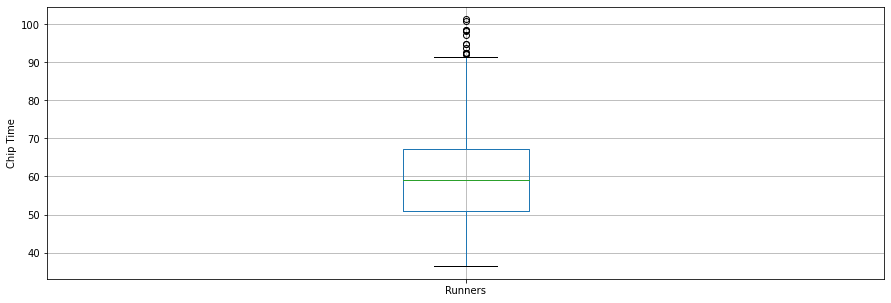

In [210]:
df7.boxplot(column='Runner_mins')
plt.grid(True,axis='y')
plt.ylabel('Chip Time')
plt.xticks([1],['Runners'])

Below is a distribution plot of runners' chip times plotted using the seaborn library. The distribution looks almost normal.

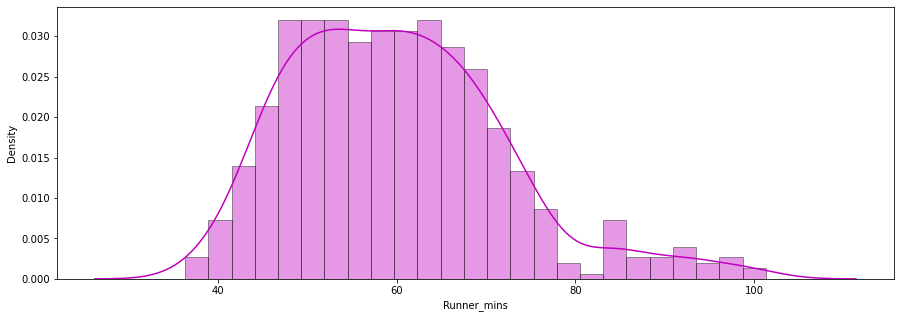

In [212]:
x=df7['Runner_mins']
ax=sns.distplot(x,hist=True,kde=True,rug=False,color='m',bins=25,hist_kws={'edgecolor':'black'})

The third question deals with whether there were any performance differences between males and females of various age groups. 
Below is a distribution plot of chip times for males and females.

C:\Users\HARITHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HARITHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


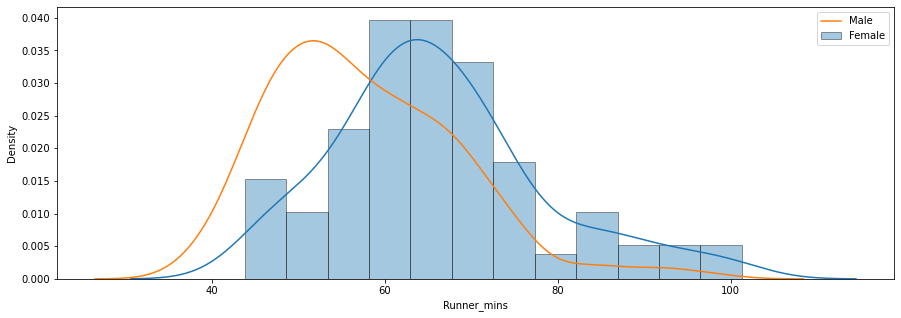

In [214]:
fe = df7.loc[df7[' Gender']==' F']['Runner_mins']
ma = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(fe, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(ma, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

The distribution indicates that females were slower than males on average. 
we can use the groupby() method to compute summary statistics for males and females separately as shown below.

In [215]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  


The average chip time for all females and males was ~66 mins and ~58 mins, respectively. 
Below is a side-by-side boxplot comparison of male and female finish times.

Text(0.5, 0.98, '')

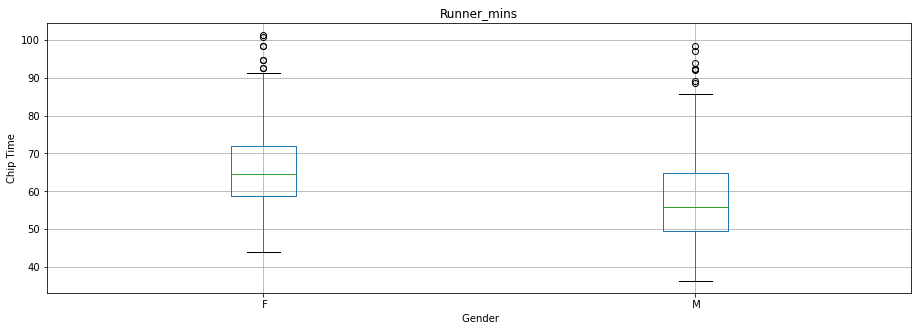

In [216]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")